In [1]:
# common 
import os
import numpy as np
import pandas as pd

# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# fine tuning
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import the data
data_dir = r"C:\Users\user\Desktop\project\car price\car_price.csv"
df = pd.read_csv(data_dir, nrows=1000)


In [5]:
# view the data frame
df.head()


,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [6]:
# shape the data frame
df.shape

(1000, 10)

In [7]:
# viewing the column name
df.columns

Index(['Unnamed: 0', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats'],
      dtype='object')

In [8]:
# datatypes of each column
df.dtypes

Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [9]:
# check for null values
df.isna().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [10]:
# make a copy of a data frame
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [11]:
# remove unwanted column
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [12]:
# renaming car_name as model
# creating a column as manufacturer
# only model name
df.rename(columns={'car_name': 'model'}, inplace=True)
df['manufacturer'] = df['model'].map(lambda x: str(x).strip().split(" ")[0])
df['model'] = df['model'].map(lambda x: str(x).strip().split(" ")[1])

In [13]:
# changing kms driven to numeric
df['kms_driven'] = df['kms_driven'].map(lambda x: x.rstrip(' kms'))
df['kms_driven'] = df['kms_driven'].map(lambda x: x.replace(',', ''))
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

In [14]:
# changing engine into numeric
df['engine'] = df['engine'].map(lambda x: x.rstrip(' cc'))
df['engine'] = pd.to_numeric(df['engine'])

In [15]:
# removing seats abbrevation
df['Seats'] = df['Seats'].map(lambda x: x.rstrip(' Seats'))

In [16]:
df['manufacturer'].value_counts()

manufacturer
Maruti           214
Hyundai          182
Honda            125
Mahindra          60
Mercedes-Benz     54
Toyota            47
BMW               39
Volkswagen        34
Tata              31
Audi              31
Ford              27
Renault           26
Kia               23
Skoda             23
Jeep              14
MG                12
Nissan            12
Chevrolet         12
Land               9
Jaguar             7
Volvo              5
Datsun             3
Porsche            2
Mini               2
Lexus              1
Mitsubishi         1
Force              1
Premier            1
Fiat               1
Maserati           1
Name: count, dtype: int64

In [17]:
# Splitting car price as price and multiply
df[['price', 'multiply']] = df['car_prices_in_rupee'].str.split(' ', n=1, expand=True)

# Drop the original column 'car_prices_in_rupee'
df.drop(columns=['car_prices_in_rupee'], inplace=True)


In [18]:
# converting multiply column into numerical value
df['multiply']=df['multiply'].str.replace('Lakh','100000')
df['multiply']=df['multiply'].str.replace('Crore','10000000')
df['multiply'] = pd.to_numeric(df['multiply'])

In [19]:
# getting price in actual numbers
df['price']=df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])
df['price'] = df['price'] * df['multiply']

In [20]:
# remove the multiply column
df = df.drop(columns=["multiply"], axis=1)

In [21]:
# rename the column names
df.rename(columns={'manufacture': 'year'}, inplace=True)

In [22]:
# rearrange the data frame
df = df.iloc[:,[8,0,5,1,6,2,3,7,4,9]]

In [23]:
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,Jeep,Compass,2017,86226,1956,Diesel,Manual,5,1st Owner,1003000.0
1,Renault,Duster,2021,13248,1330,Petrol,Automatic,5,1st Owner,1283000.0
2,Toyota,Camry,2016,60343,2494,Petrol,Automatic,5,1st Owner,1640000.0
3,Honda,Jazz,2018,26696,1199,Petrol,Automatic,5,1st Owner,777000.0
4,Volkswagen,Polo,2016,69414,1199,Petrol,Manual,5,1st Owner,515000.0


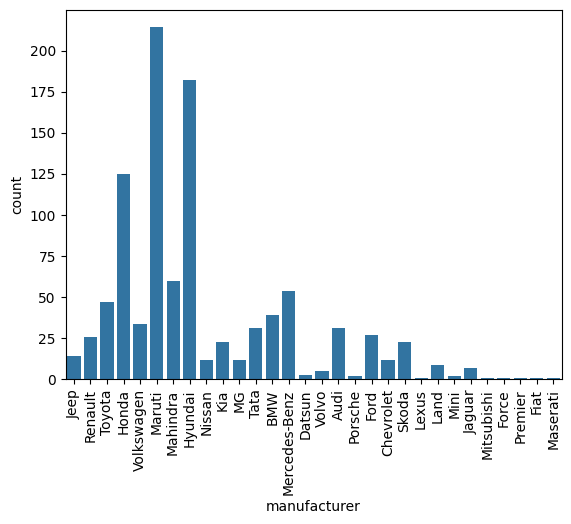

In [24]:
# replace nan with zero and inf with finite numbers because input is too large for training
df['price'] = np.nan_to_num(df['price'])

# car count based on manufacturer
ax = sns.countplot(data=df, x=df['manufacturer'])
ax.tick_params(axis='x', rotation=90)







  

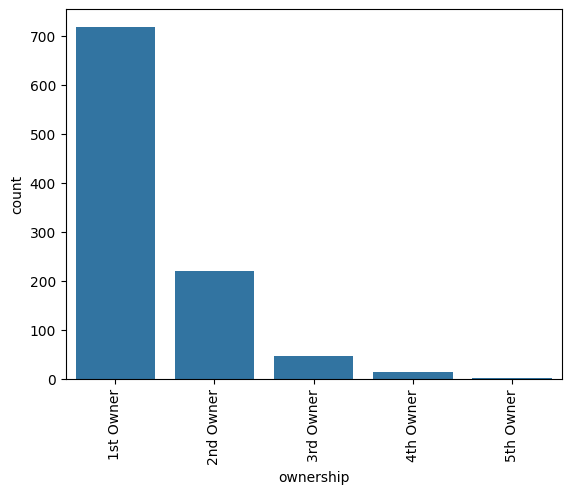

In [25]:
# car count based on ownership
ax = sns.countplot(data=df, x=df['ownership'])
ax.tick_params(axis='x', rotation=90)

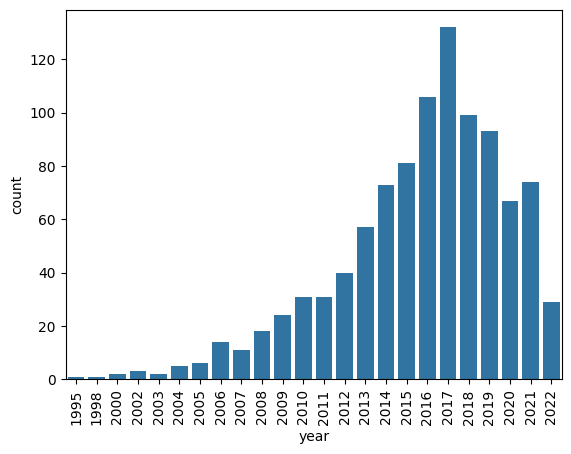

In [26]:
# car count based on year
ax = sns.countplot(data=df, x=df['year'])
ax.tick_params(axis='x', rotation=90)

In [27]:
df['fuel_type'].value_counts()

fuel_type
Petrol      585
Diesel      393
Cng          12
Lpg           6
Electric      4
Name: count, dtype: int64

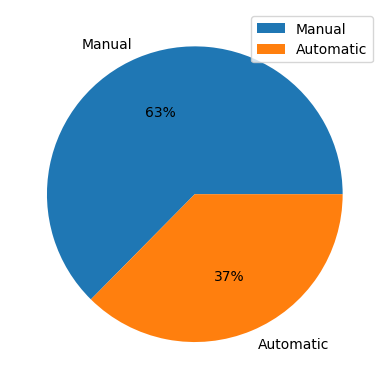

In [28]:
# distribution of cars by transmission
labels = ['Manual', 'Automatic']
plt.pie(df['transmission'].value_counts(), labels = labels, autopct='%.0f%%')
plt.legend()
plt.show()

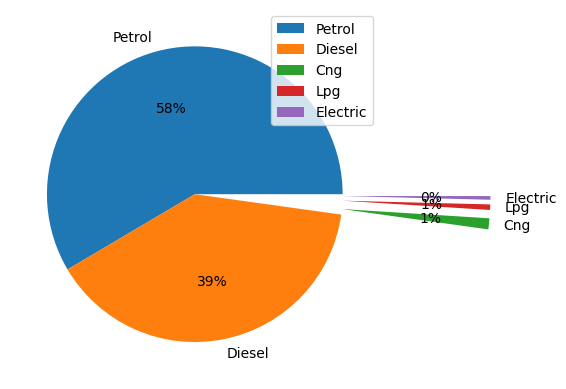

In [29]:
# distribution of cars by fuel type
labels = ['Petrol', 'Diesel', 'Cng', 'Lpg', 'Electric']
plt.pie(df['fuel_type'].value_counts(), labels = labels, explode=[0, 0, 1, 1, 1], autopct='%.0f%%')
plt.legend()
plt.show()


<Axes: title={'center': 'Average car price by Year'}, xlabel='year'>

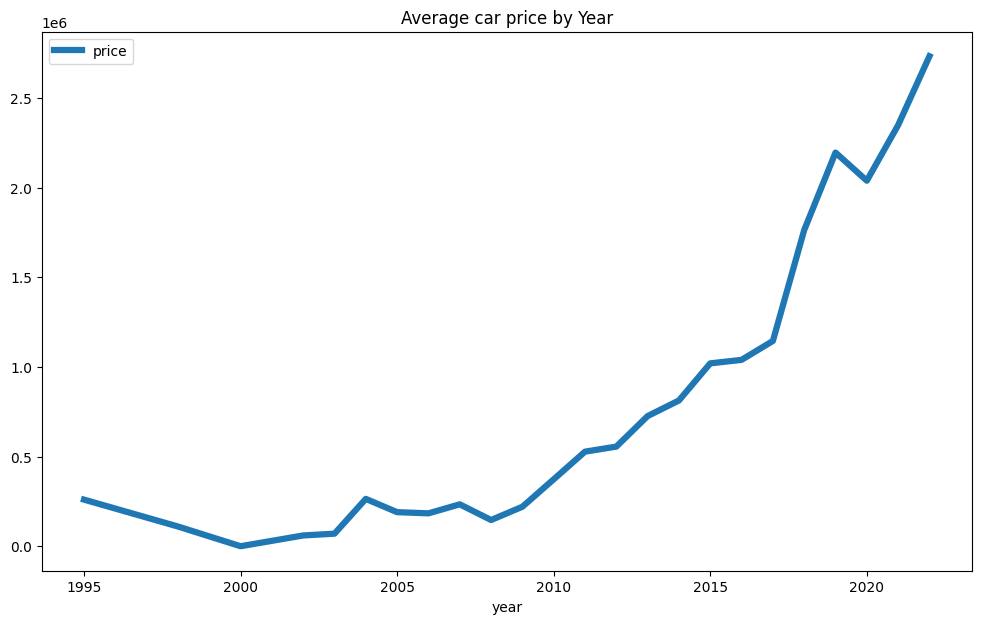

In [30]:
vis_1=pd.pivot_table(df, index=['year'],values = ['price'],aggfunc = 'mean') 
vis_1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

<Axes: title={'center': 'Average car price by kilometers driven'}, xlabel='kms_driven'>

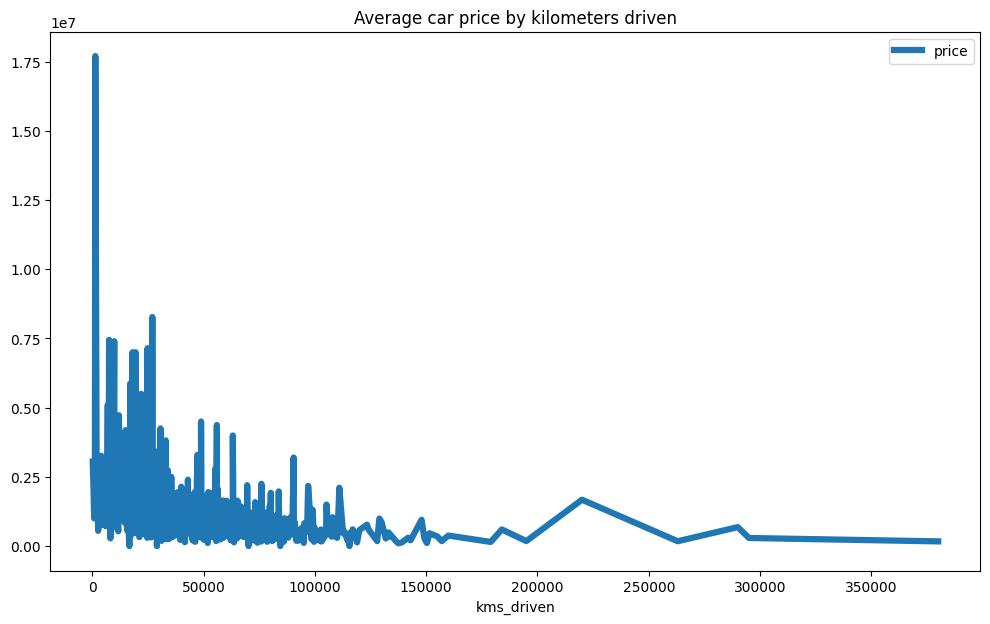

In [31]:
vis_2=pd.pivot_table(df, index=['kms_driven'],values = ['price'],aggfunc = 'mean') 
vis_2.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by kilometers driven')

<Axes: title={'center': 'Average car price by number of owners'}, xlabel='ownership'>

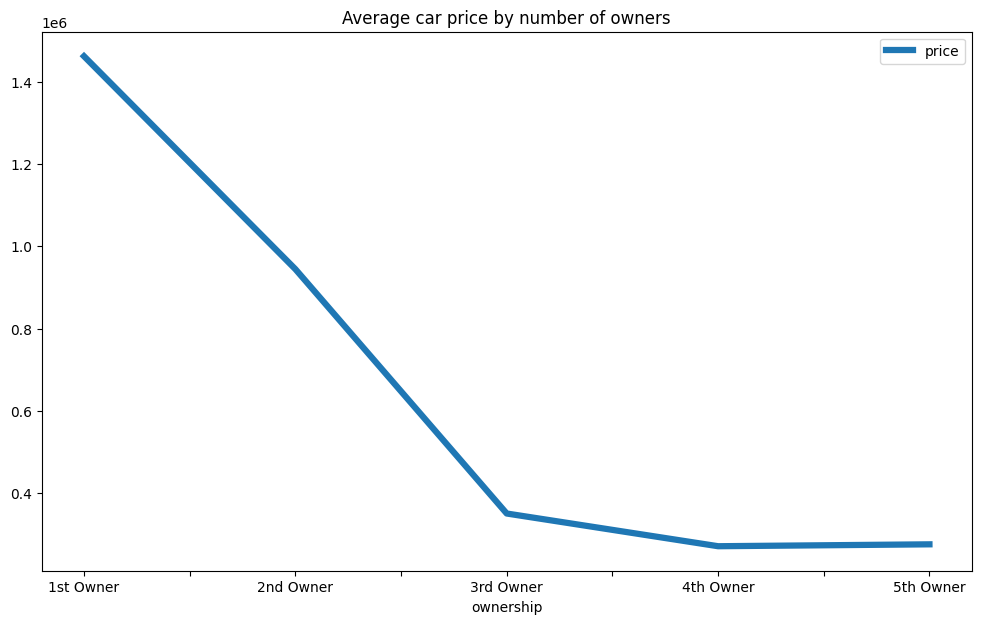

In [32]:
vis_3=pd.pivot_table(df, index=['ownership'],values = ['price'],aggfunc = 'mean') 
vis_3.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by number of owners')

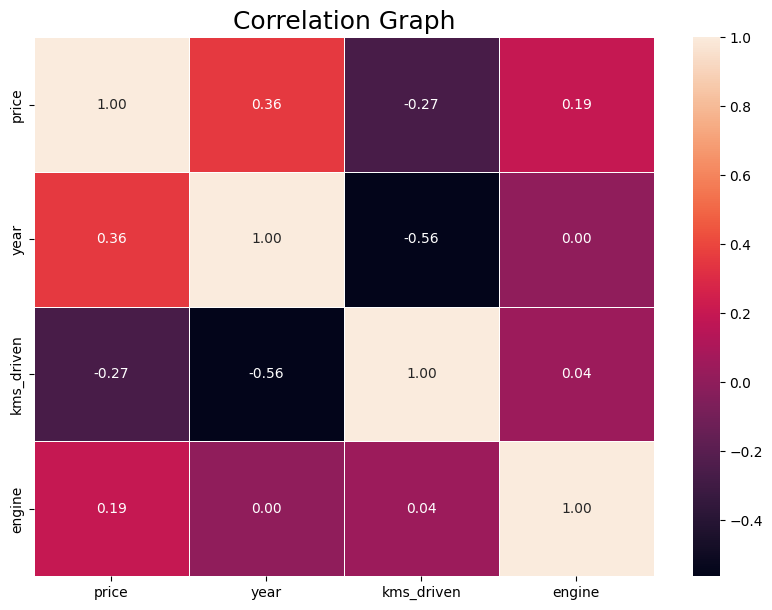

In [33]:
# Drop 'model' column before generating the heatmap
df_filtered = df[["price", "year", "kms_driven", "engine"]].dropna()

# Generate correlation matrix and heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_filtered.corr(), annot=True, linewidths=.5, fmt='.2f')
plt.title("Correlation Graph", size=18)
plt.show()



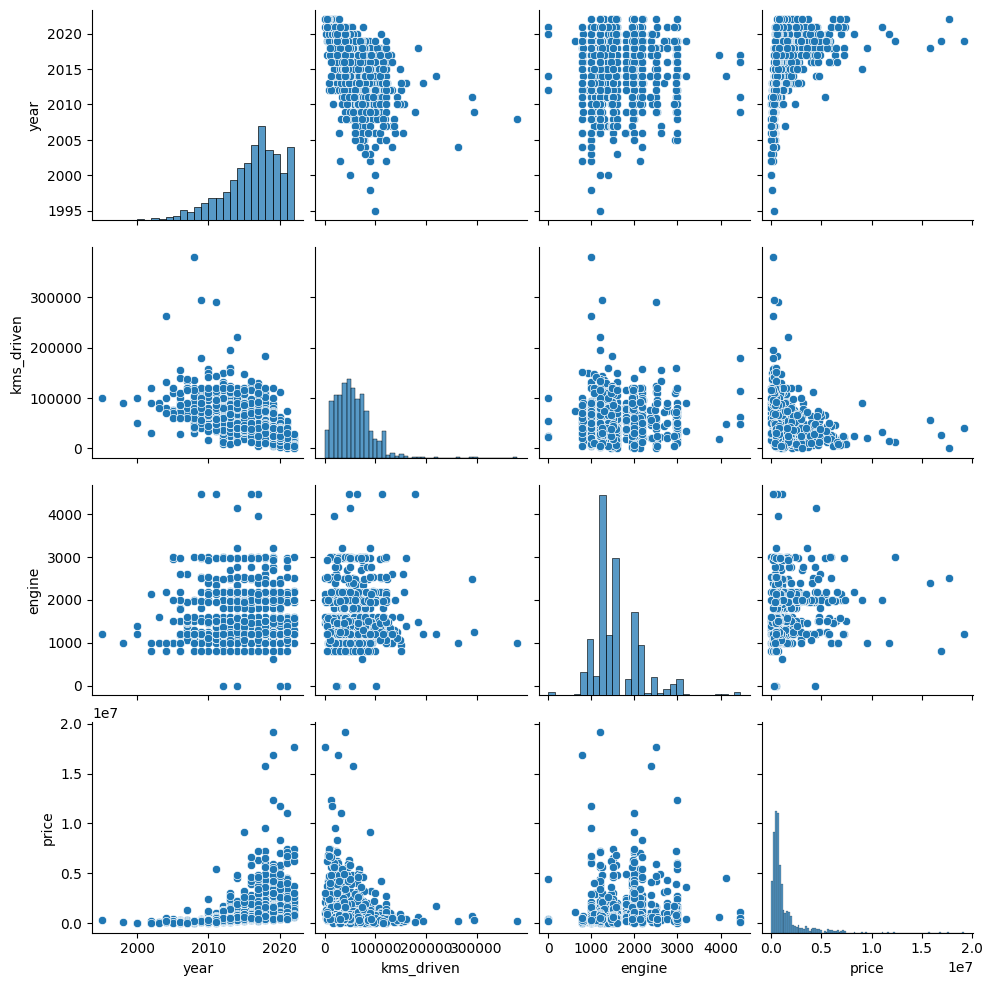

In [34]:
# pairplot 
sns.pairplot(df)

In [35]:
labelencoder = LabelEncoder()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1000 non-null   object 
 1   model         1000 non-null   object 
 2   year          1000 non-null   int64  
 3   kms_driven    1000 non-null   int64  
 4   engine        1000 non-null   int64  
 5   fuel_type     1000 non-null   object 
 6   transmission  1000 non-null   object 
 7   Seats         1000 non-null   object 
 8   ownership     1000 non-null   object 
 9   price         1000 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


In [37]:
# encoding the car's manufacturer with label encoder
df['manufacturer'] = labelencoder.fit_transform(df['manufacturer'])

# encoding the car's model with label encoder
df['model'] = labelencoder.fit_transform(df['model'])

# encoding the car's fuel type with label encoder
df['fuel_type'] = labelencoder.fit_transform(df['fuel_type'])

# encoding the car's transmission with label encoder
df['transmission'] = labelencoder.fit_transform(df['transmission'])

# encoding the number of seats with label encoder
df['Seats'] = labelencoder.fit_transform(df['Seats'])

# encoding the number of owners with label encoder
df['ownership'] = labelencoder.fit_transform(df['ownership'])

In [38]:
# view the encoded data frame
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,10,35,2017,86226,1956,1,1,2,0,1003000.0
1,24,39,2021,13248,1330,4,0,2,0,1283000.0
2,27,28,2016,60343,2494,4,0,2,0,1640000.0
3,7,72,2018,26696,1199,4,0,2,0,777000.0
4,28,96,2016,69414,1199,4,1,2,0,515000.0


In [39]:
# splitting into feature and label
X = df.drop('price', axis=1)
y = df['price']

In [40]:
X.head(), X.shape

(   manufacturer  model  year  kms_driven  engine  fuel_type  transmission  \
 0            10     35  2017       86226    1956          1             1   
 1            24     39  2021       13248    1330          4             0   
 2            27     28  2016       60343    2494          4             0   
 3             7     72  2018       26696    1199          4             0   
 4            28     96  2016       69414    1199          4             1   
 
    Seats  ownership  
 0      2          0  
 1      2          0  
 2      2          0  
 3      2          0  
 4      2          0  ,
 (1000, 9))

In [41]:
y.head(), y.shape

(0    1003000.0
 1    1283000.0
 2    1640000.0
 3     777000.0
 4     515000.0
 Name: price, dtype: float64,
 (1000,))

In [42]:
# splitting into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 9), (200, 9), (800,), (200,))

In [43]:
# train
regr = RandomForestRegressor(n_estimators=1500, max_depth=50, random_state=42)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=50, n_estimators=1500, random_state=42)

In [44]:
# make prediction
predictions = regr.predict(X_test)

Text(0.5, 1.0, 'Prediction and Original data correlation')

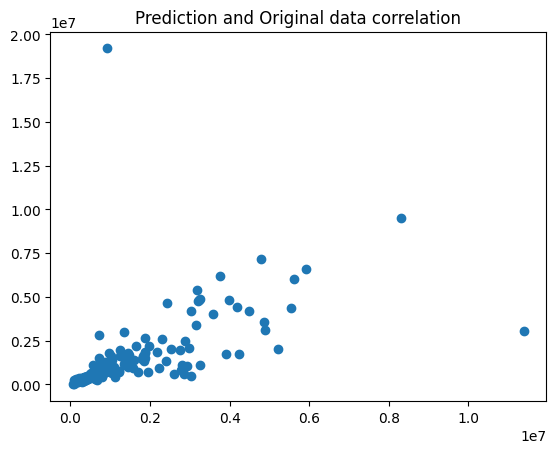

In [45]:
plt.scatter(predictions,y_test)
plt.title('Prediction and Original data correlation')

In [46]:
# score on train data
regr.score(X_train, y_train)

0.9330326850011257

In [47]:
# mse
mse = mean_squared_error(y_test.values.ravel(), predictions)

In [48]:
# mae
mae = mean_absolute_error(y_test.values.ravel(), predictions)

In [49]:
# r2
r2 = r2_score(y_test.values.ravel(), predictions)

In [50]:
# results
print(f"MSE: {round(mse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"R2 Score: {round(r2, 2)}")

MSE: 2595859702897.55
MAE: 548004.01
R2 Score: 0.29


In [51]:
#Fine Tune Model

In [55]:

parameters = {
    'max_depth': [50, 70, 100, 150, 200, 300, 500 ],
    'n_estimators': [100, 200, 300, 500, 1000, 1250, 1500]
}


In [56]:
gridforest = GridSearchCV(regr, parameters, cv=3, n_jobs=-1)
gridforest.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=50, n_estimators=1500,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [50, 70, 100, 150, 200, 300, 500],
                         'n_estimators': [100, 200, 300, 500, 1000, 1250,
                                          1500]})

In [63]:
# Get the best parameters found by the grid search
best_params = gridforest.best_params_


In [79]:
print(best_params)

{'max_depth': 500, 'n_estimators': 100}


In [85]:
# train
regr = RandomForestRegressor(n_estimators=100, max_depth=500, random_state=42)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=500, random_state=42)

In [86]:
# make prediction
predictions = regr.predict(X_test)

In [88]:
# score on train data
regr.score(X_train, y_train)*100

93.19291263922699